In [3]:
import pandas as pd

import matplotlib.ticker as tick
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
from util.reformat_large_tick_values import reformat_large_tick_values as ticker

from sqlalchemy.engine import create_engine
import warnings
warnings.filterwarnings('ignore', message='Cannot create BigQuery Storage client*')

In [4]:
engine = create_engine('bigquery://', credentials_path= 'key/iowa-liquor-sales-365322-12ff7a5498e6.json')

In [6]:
counties = ['Polk', 'Linn', 'Scott', 'Johnson', 'Black Hawk', 'Woodbury', 'Dubuque', 'Story', 'Dallas', 'Pottawattamie']
colors = ['#edc948', '#59a14f', '#ff9da7', '#76b7b2', '#4e79a7', '#b07aa1', '#bab0ac', '#9c755f', '#e15759', '#f28e2b']
county_colors = {county: color for county, color in zip(counties, colors)}

# Data imports

Liquor Sales Data: Iowa Liquor Sales dataset, Iowa Department of Commerce, Alcoholic Beverages Division
 `bigquery-public-data.iowa_liquor_sales`  
Data represents sales to Iowa Class "E" liquor licensees. Examples include grocery stores, liquor stores etc which sell liquor for off-premises consumption. Full dataset stored in BigQuery. Data accessed via SQL queries.

Population Data: United States Census Bureau, https://www.census.gov/quickfacts/fact/table/IA/POP010220 
Accurate population numbers are limited to 2020, the year of the US census. In this analysis, population counts and percent minors for 2020 are used for all years (2018-2023). Adult population was extrapolated using the "Persons under 18 years, percent" census data column as no counts are available for 21 years and older.

Data imports from source and dataframe creation available in [Iowa Liquor Exploratory Analysis](iowa_liquor_exploratory_analysis.ipynb)

In [8]:
liters_sold_per_adult_df = pd.read_csv('liters_sold_per_adult.csv')
liters_sold_per_adult_df

,county,liters_sold_per_adult
0,Polk,80.510252
1,Black Hawk,72.315520
2,Scott,70.322979
3,Pottawattamie,68.566631
4,Linn,68.438600
5,Johnson,62.911275
6,Woodbury,60.300233
7,Dubuque,55.686160
8,Story,51.906894
9,Dallas,48.841635


In [15]:
liters_county_month_df = pd.read_csv('liters_county_month.csv')
liters_county_month_df['month_year'] = pd.to_datetime(liters_county_month_df['month_year'])
liters_county_month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   liters_sold_county  720 non-null    float64       
 1   month               720 non-null    int64         
 2   year                720 non-null    int64         
 3   county              720 non-null    object        
 4   month_year          720 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 28.2+ KB


In [ ]:
pivot_table_month_df_long = pd.read_csv('pivot_table_month_df_long.csv')

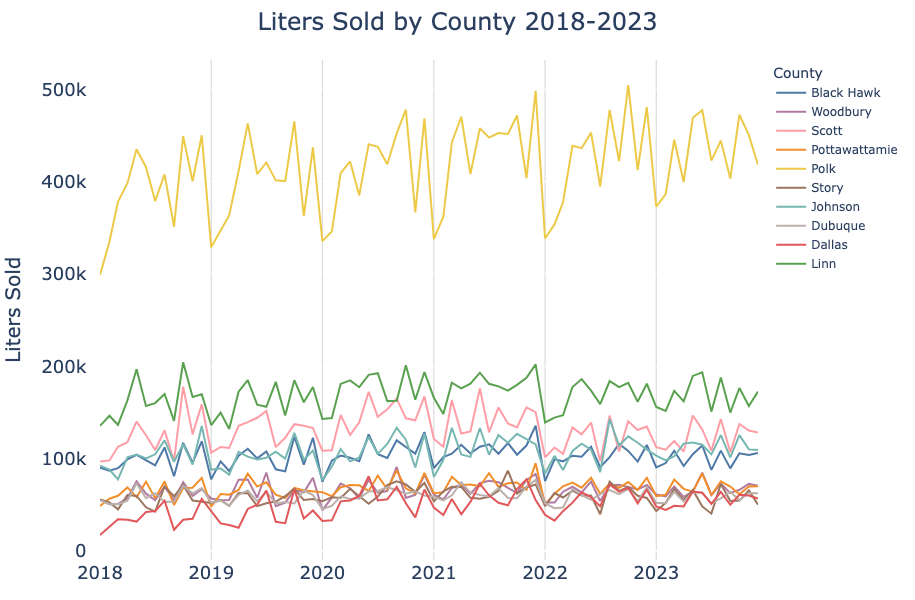

In [24]:
liters_county_month_df.sort_values(by=['month_year'], inplace=True)
fig = px.line(
    liters_county_month_df,
    x='month_year',
    y='liters_sold_county',
    orientation='h',  # Horizontal bar chart
    color='county',  # Assign colors based on 'county' field
    color_discrete_map=county_colors,  # Apply custom colors
    labels={'liters_sold': 'Liters Sold ', 'county': 'County ', 'month_year': 'Month, Year '},  # Custom labels
    height=600  # Adjust height to accommodate all counties
)

# Update layout
fig.update_layout(
    xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        title_font = dict(size = 20),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title= 'Liters Sold',
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  '#
    ),
    
    title=dict(
        text = "Liters Sold by County 2018-2023",
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'
     ),

    showlegend=True, 
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background for the plot area
    margin=dict(l=40, r=40, t=60, b=40),  # Left, Right, Top, Bottom margins
    title_font_size = 24
)

fig.show()

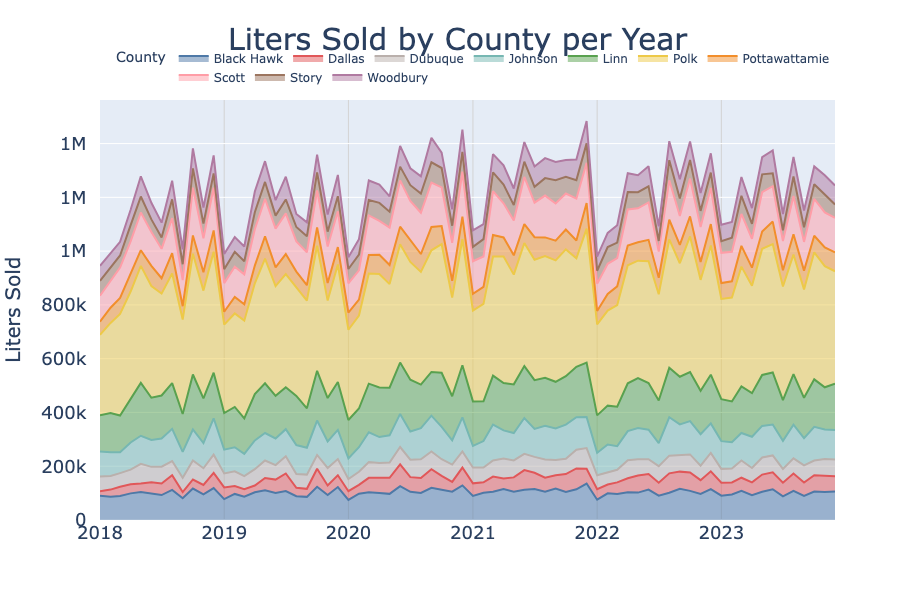

In [23]:

# Create the stacked area chart
fig = px.area(
    pivot_table_month_df_long,
    x='month_year', 
    y='Liters Sold',
    color='County',
    color_discrete_map=county_colors,  # Custom colors
    title='Liters Sold by County',
    labels={'index': 'Month Year'}
    
)

# Update layout
fig.update_layout(

        xaxis=dict(
        title=None,
        tickfont=dict(size=18),
        showgrid = True,
        gridcolor = 'LightGrey'

    ), 
    yaxis=dict(
        title="Liters Sold",
        title_font = dict(size = 20),
        tickfont=dict(size=18),
        ticksuffix = '  ',
        tickformat=".0s"
    ),

    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
        title=dict(
        text = "Liters Sold by County per Year",  
        font = dict(size = 30),
        x = .5,
        xanchor = 'center'),
     width = 1100, height = 600  
)
# Display the plot
fig.show()

### We see some seasonal patterns, the most notable being a jump in sales just before the new year and a drop in January. This may be due to the fact that this retail sales. Stores likely stock up for December and new year celebrations and pause ordering afterward. 